In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat

In [11]:
data1=loadmat('ex7data2.mat')
data1

{'X': array([[ 1.84207953,  4.6075716 ],
        [ 5.65858312,  4.79996405],
        [ 6.35257892,  3.2908545 ],
        [ 2.90401653,  4.61220411],
        [ 3.23197916,  4.93989405],
        [ 1.24792268,  4.93267846],
        [ 1.97619886,  4.43489674],
        [ 2.23454135,  5.05547168],
        [ 2.98340757,  4.84046406],
        [ 2.97970391,  4.80671081],
        [ 2.11496411,  5.37373587],
        [ 2.12169543,  5.20854212],
        [ 1.5143529 ,  4.77003303],
        [ 2.16979227,  5.27435354],
        [ 0.41852373,  4.88312522],
        [ 2.47053695,  4.80418944],
        [ 4.06069132,  4.99503862],
        [ 3.00708934,  4.67897758],
        [ 0.66632346,  4.87187949],
        [ 3.1621865 ,  4.83658301],
        [ 0.51155258,  4.91052923],
        [ 3.1342801 ,  4.96178114],
        [ 2.04974595,  5.6241395 ],
        [ 0.66582785,  5.24399257],
        [ 1.01732013,  4.84473647],
        [ 2.17893568,  5.29758701],
        [ 2.85962615,  5.26041997],
        [ 1.30882588,  

In [16]:
X=data1['X']
X.shape

(300, 2)

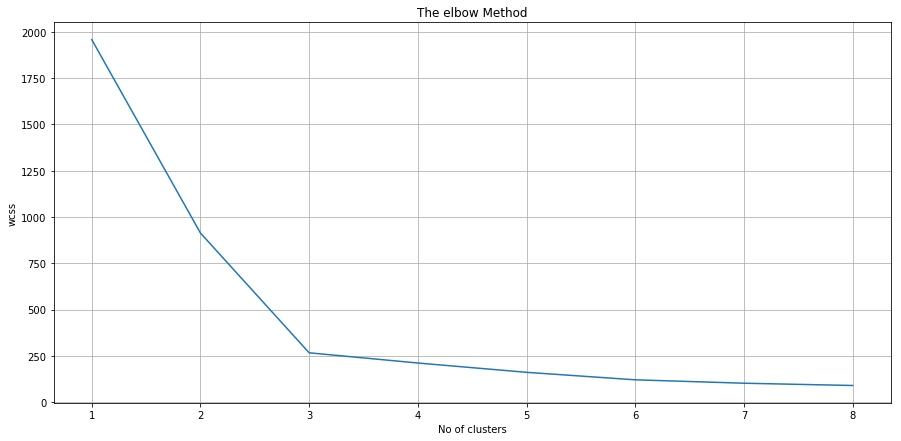

In [24]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init= 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.subplots(figsize=(15,7))
plt.plot(range(1,9),wcss)
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.title('The elbow Method')
plt.grid(True)
plt.show()

In [25]:
kmeans1=KMeans(3)
kmeans1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

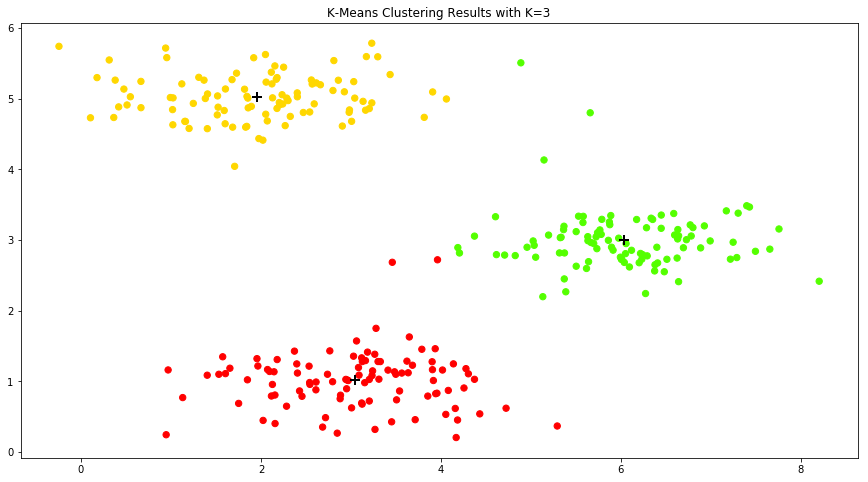

In [26]:
plt.subplots(figsize=(15,8))
plt.scatter(X[:,0], X[:,1], s=40, c=kmeans1.labels_, cmap=plt.cm.prism) 
plt.title('K-Means Clustering Results with K=3')
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

# Image Compression

In [40]:
img=plt.imread('bird_small.png')
img.shape

(128, 128, 3)

In [46]:
newimg=img.reshape(128*128,3)
newimg.shape

(16384, 3)

In [51]:
kmeans2=KMeans(16)
kmeans2.fit(newimg)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [52]:
B = kmeans2.cluster_centers_[kmeans2.labels_].reshape(img.shape[0], img.shape[1], 3)

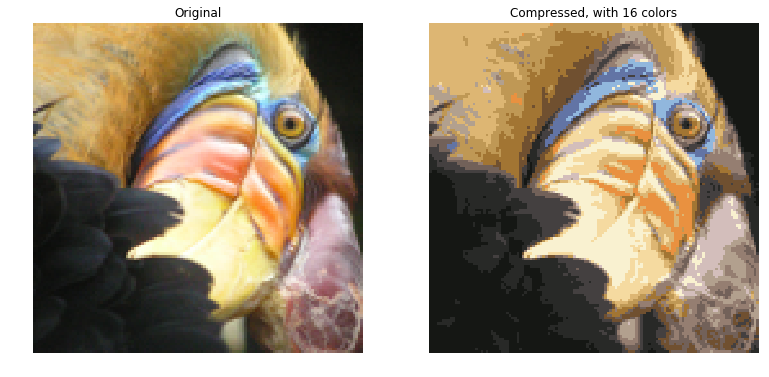

In [53]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,9))
ax1.imshow(img)
ax1.set_title('Original')
ax2.imshow(B)
ax2.set_title('Compressed, with 16 colors')
for ax in fig.axes:
    ax.axis('off')

# PCA analysis

In [55]:
data2 = loadmat('ex7data1.mat')
data2

{'X': array([[ 3.38156267,  3.38911268],
        [ 4.52787538,  5.8541781 ],
        [ 2.65568187,  4.41199472],
        [ 2.76523467,  3.71541365],
        [ 2.84656011,  4.17550645],
        [ 3.89067196,  6.48838087],
        [ 3.47580524,  3.63284876],
        [ 5.91129845,  6.68076853],
        [ 3.92889397,  5.09844661],
        [ 4.56183537,  5.62329929],
        [ 4.57407171,  5.39765069],
        [ 4.37173356,  5.46116549],
        [ 4.19169388,  4.95469359],
        [ 5.24408518,  4.66148767],
        [ 2.8358402 ,  3.76801716],
        [ 5.63526969,  6.31211438],
        [ 4.68632968,  5.6652411 ],
        [ 2.85051337,  4.62645627],
        [ 5.1101573 ,  7.36319662],
        [ 5.18256377,  4.64650909],
        [ 5.70732809,  6.68103995],
        [ 3.57968458,  4.80278074],
        [ 5.63937773,  6.12043594],
        [ 4.26346851,  4.68942896],
        [ 2.53651693,  3.88449078],
        [ 3.22382902,  4.94255585],
        [ 4.92948801,  5.95501971],
        [ 5.79295774,  

In [56]:
X=data2['X']

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xnew=sc.fit_transform(X)

In [66]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
Xpca=pca.fit_transform(Xnew)
explained_varience=pca.explained_variance_ratio_
explained_varience

array([ 0.86776519])

In [67]:
Xpca

array([[ 1.49631261],
       [-0.92218067],
       [ 1.22439232],
       [ 1.64386173],
       [ 1.2732206 ],
       [-0.97681976],
       [ 1.26881187],
       [-2.34148278],
       [-0.02999141],
       [-0.78171789],
       [-0.6316777 ],
       [-0.55280135],
       [-0.0896816 ],
       [-0.5258541 ],
       [ 1.56415455],
       [-1.91610366],
       [-0.88679735],
       [ 0.95607375],
       [-2.32995679],
       [-0.47793862],
       [-2.21747195],
       [ 0.38900633],
       [-1.78482346],
       [ 0.05175486],
       [ 1.66512392],
       [ 0.50813572],
       [-1.23711018],
       [-1.17198677],
       [ 0.84221686],
       [-0.00693174],
       [-0.22794195],
       [-1.51309518],
       [ 1.33874082],
       [-0.5925244 ],
       [ 0.67907605],
       [-1.35298   ],
       [ 1.68749495],
       [-1.39235931],
       [ 2.55992598],
       [-0.27850702],
       [-0.97677692],
       [ 0.88820006],
       [ 1.29666127],
       [-0.98966774],
       [ 1.81272352],
       [-0